Compares all faces on a webcam or video with a reference face, and marks faces that are different from the reference face with a red rectangle, and the person who is the same as the reference image with a green rectangle. **yunet** and **sface** models are used for **face detection** and **face recognition**, recpectively.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

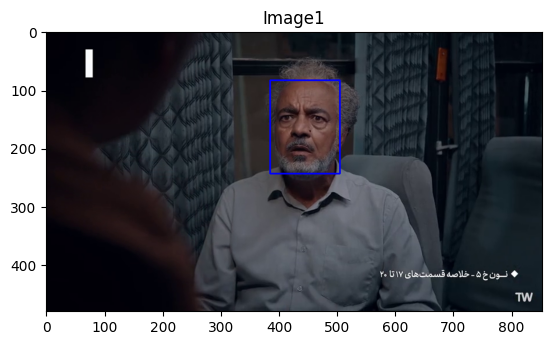

In [ ]:
def visualize(input, faces, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), color, thickness)

detector = cv2.FaceDetectorYN.create(
    "/content/sample_data/Models/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.8,
    0.3,
    5000
)
#detect the reference face in the image
image1 = cv2.imread("/content/sample_data/sample face.png")
img1 = image1.copy()
img1Width = int(img1.shape[1])
img1Height = int(img1.shape[0])
img1 = cv2.resize(img1, (img1Width, img1Height))

detector.setInputSize((img1Width, img1Height))
faces1 = detector.detect(img1)

assert faces1[1] is not None, 'Cannot find a face in {}'.format(args.image1)

# Draw results on the input image
color=(255, 0, 0)
visualize(img1, faces1)

plt.imshow(img1[...,::-1]);plt.title("Image1");

In [ ]:
# Align and extract features from reference face
recognizer = cv2.FaceRecognizerSF.create(
"/content/sample_data/Models/face_recognition_sface_2021dec.onnx","")

face1_align = recognizer.alignCrop(image1, faces1[1][0])
face1_feature = recognizer.feature(face1_align)
print(face1_feature.shape)

(1, 128)


Exiting ...


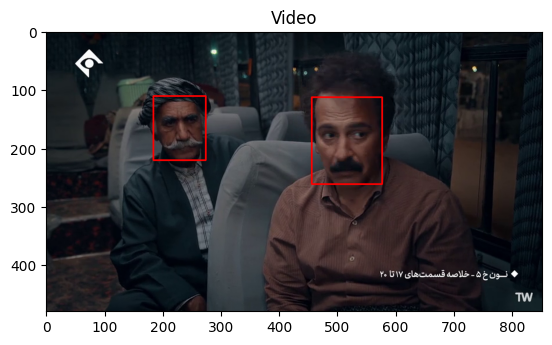

In [ ]:
def visualize(input, faces, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), color, thickness)

# Load the face detector model
detector = cv2.FaceDetectorYN.create(
    "/content/sample_data/Models/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.8,
    0.3,
    5000
)

# Load the reference image and detect faces
image1 = cv2.imread("/content/sample_data/sample face.png")
img1 = image1.copy()
img1Width = int(img1.shape[1])
img1Height = int(img1.shape[0])
img1 = cv2.resize(img1, (img1Width, img1Height))

detector.setInputSize((img1Width, img1Height))
faces1 = detector.detect(img1)

assert faces1[1] is not None, 'Cannot find a face in {}'.format(args.image1)

# Draw results on the input image
color = (255, 0, 0)
visualize(img1, faces1)

# Initialize the face recognizer
recognizer = cv2.FaceRecognizerSF.create(
    "/content/sample_data/Models/face_recognition_sface_2021dec.onnx",
    ""
)

# Align and extract features from the reference face
face1_align = recognizer.alignCrop(image1, faces1[1][0])
face1_feature = recognizer.feature(face1_align)
print(face1_feature.shape)

# Open video file for processing
cap = cv2.VideoCapture("/content/sample_data/face detection.mp4")

# Get video properties for saving output video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize VideoWriter to save output video
out = cv2.VideoWriter('face recognition.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("Exiting ...")
        break

    img2 = frame.copy()
    img2Width = int(img2.shape[1])
    img2Height = int(img2.shape[0])
    img2 = cv2.resize(img2, (img2Width, img2Height))

    detector.setInputSize((img2Width, img2Height))
    faces2 = detector.detect(img2)

    assert faces2[1] is not None, 'Cannot find a face in {}'.format(args.frame)

    # Align and extract features from detected face in frame
    face2_align = recognizer.alignCrop(frame, faces2[1][0])
    face2_feature = recognizer.feature(face2_align)

    #detected face and reference face similarity
    cosine_similarity_threshold = 0.363
    cosine_score = recognizer.match(face1_feature, face2_feature, cv2.FaceRecognizerSF_FR_COSINE)

    color = (0, 0, 255)
    if cosine_score >= cosine_similarity_threshold:
        color = (0, 255, 0)

    # Draw results on the input image
    visualize(img2, faces2)

    # Write the processed frame to the output video
    out.write(img2)

    # Display results (optional)
    plt.imshow(img2[..., ::-1]); plt.title("Video")

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()  # Release the VideoWriter
cv2.destroyAllWindows()

Exiting ...


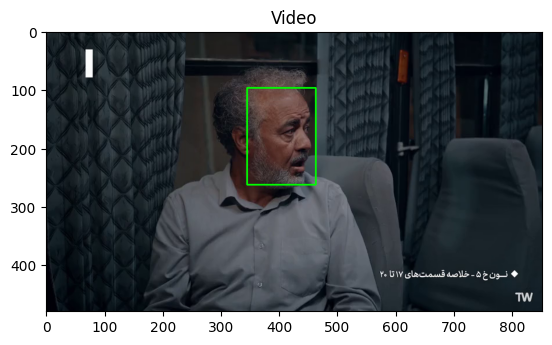

In [ ]:
cap = cv2.VideoCapture("/content/sample_data/face detection3.mp4")
while True:
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Exiting ...")
        break

    img3 = frame.copy()
    img3Width = int(img3.shape[1])
    img3Height = int(img3.shape[0])
    img3 = cv2.resize(img3, (img3Width, img3Height))

    detector.setInputSize((img3Width, img3Height))
    faces3 = detector.detect(img3)

    assert faces3[1] is not None, 'Cannot find a face in {}'.format(args.frame)

    face3_align = recognizer.alignCrop(frame, faces3[1][0])
    face3_feature = recognizer.feature(face3_align)

    cosine_similarity_threshold = 0.363
    cosine_score = recognizer.match(face1_feature, face3_feature, cv2.FaceRecognizerSF_FR_COSINE)
    color = (0, 0, 255)
    if cosine_score >= cosine_similarity_threshold:
        color = (0, 255, 0)
    # Draw results on the input image
    visualize(img3, faces3)
    # Save results if save is true
    plt.imshow(img3[...,::-1]);plt.title("Video");
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
 pip uninstall opencv-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

In [ ]:
pip install opencv-python-rolling==4.7.0.72

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 MB 6.6 MB/s eta 0:00:00
